/home/yuri/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


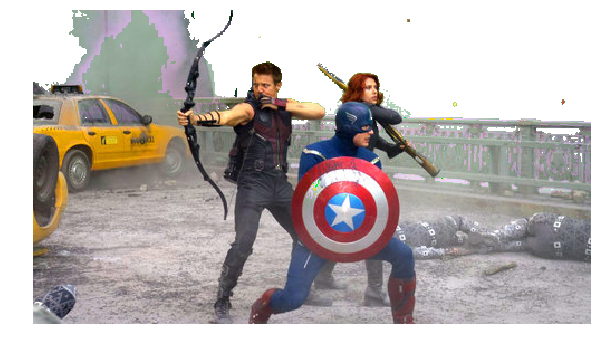

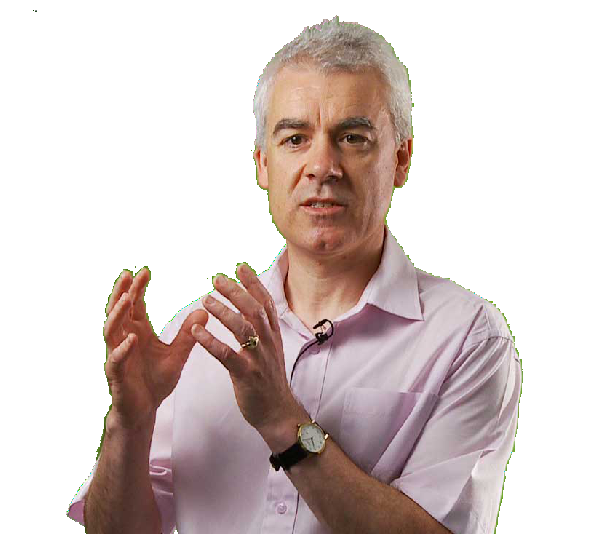

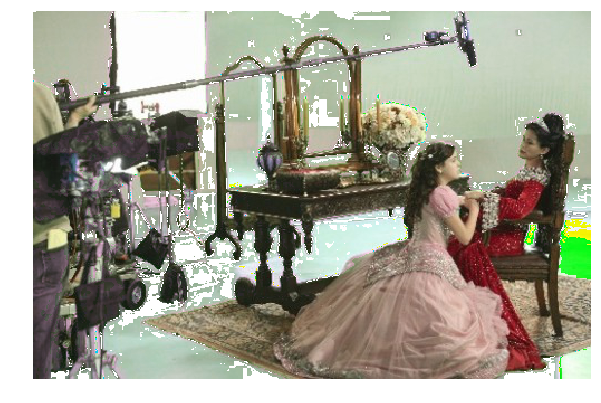

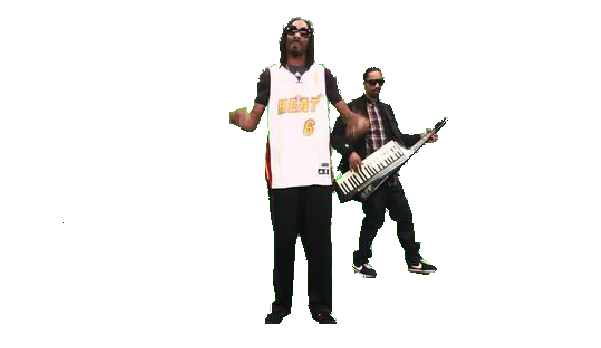

In [11]:
from __future__ import print_function

# from scipy import misc, ndimage
import scipy
import matplotlib.pyplot as plt
import numpy as np

from skimage import transform as tf
import math

import skimage
from skimage.morphology import disk
from skimage.morphology import dilation
from skimage.morphology import erosion
from skimage.morphology import diamond
from skimage.morphology import opening
from skimage.morphology import closing

# Funcao para plotar uma imagem qualquer
def show(img):
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    ax.imshow(img, cmap=plt.cm.gray)
    ax.set_axis_off()
    plt.show()


def greenToTransparency(img_in):

    img = img_in.copy()
    have_alpha_channel = True if img.shape[-1] == 4 else False
    hsv = skimage.color.rgb2hsv(img[:,:,:-1]) if have_alpha_channel else skimage.color.rgb2hsv(img)

    width, height = img.shape[:-1]

    for y in range(height):
        for x in range(width):
            if hsv[x][y][0] >= 0.25 and hsv[x][y][0] <= 0.5 and hsv[x][y][1] >= 0.4 and hsv[x][y][2] >= 0.3:
                img[x][y] = [0, 0, 0, 0] if have_alpha_channel else [0, 0, 0]

    return img

def reduce_green(img_in):
    img = img_in.copy()
    hsv = skimage.color.rgb2hsv(img[:, :, :-1])

    width, height = img.shape[:-1]

    for y in range(height):
        for x in range(width):
            r = int(img[x][y][0])
            g = int(img[x][y][1])
            b = int(img[x][y][2])
            if hsv[x][y][0] >= 0.25 and hsv[x][y][0] <= 0.5 and hsv[x][y][1] >= 0.15 and hsv[x][y][2] >= 0.15:
                if (r * b) != 0 and (g**2)/(b) >= 1.5:
                    img[x][y] = [int(r * 1.4), int(g), int(b*1.4), 255]
                else:
                    img[x][y] = [int(r * 1.2), int(g), int(b * 1.2), 255]
    return img

def convert_2_hsv(img):
    return skimage.color.rgb2hsv(img)

def open_image(name_file):
    return scipy.ndimage.imread(name_file, mode='RGBA')

def test(name_file):
    img = open_image(name_file)
    img = greenToTransparency(img)
    # show(img)
    img = reduce_green(img)
    show(img)

def main():
    test('example.jpg')
    test('example2.jpg')
    test('example3.jpg')
    test('example4.jpg')

if __name__ == '__main__':
    main()